Pymaceuticals Inc.

Analysis 
#OBSERVED TREND 1 
#OBSERVED TREND 2 
#OBSERVED TREND 3


In [15]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
import os

In [16]:
# Setting the file path for clinical trial data file
filepath1=os.path.join("raw_data","clinicaltrial_data.csv") 
# Setting the file path for mouse drug data file
filepath2=os.path.join("raw_data","mouse_drug_data.csv")

# Reading the csv file
Clinical_data=pd.read_csv(filepath1)
Mouse_Drug_data=pd.read_csv(filepath2)

# Combining the data files to one single dataframe
Clinical_Combined_data=pd.merge(Clinical_data,Mouse_Drug_data,on="Mouse ID",how="left")

Tumor Response to Treatment

In [18]:
# Creating a pivot table for Clinical Tumor Response
Clinical_TumorResponse=pd.pivot_table(Clinical_Combined_data, values="Tumor Volume (mm3)",
                                      columns=["Drug"],index=["Timepoint"],aggfunc=np.mean)
Clinical_TumorResponse



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [19]:
# Droping the not needed drugs from the already existing pivot table
Clinical_TumorResponse_DF=Clinical_TumorResponse.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'],
                                                      axis=1)
Clinical_TumorResponse_DF

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


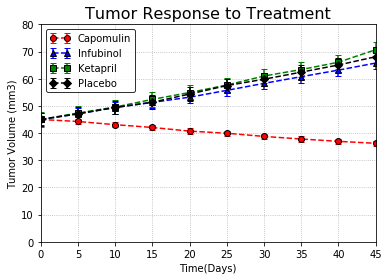

In [20]:
# Setting the lists of drugs, colors and markers respectively
drug=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
markers=["o","^","s","D"]

# Intializing the plots
fig, ax = plt.subplots()

for item in drug:
    # Setting the x_axis data,y_axis data and standard deviation for the graph
    x_data=Clinical_TumorResponse_DF.index.values
    y_data=Clinical_TumorResponse_DF[item] 
    err=sem(Clinical_TumorResponse_DF[item])
    
    # Finding the index for colors and markers
    index=drug.index(item)
    # Setting up the plot
    ax.errorbar(x_data, y_data,err,linestyle="--",color=colors[index],
                marker=markers[index],capsize=3,capthick=1,markeredgecolor='black')
    # Setting the legend
    ax.legend(loc="upper left", fancybox=True,numpoints=2,edgecolor="black")

# Setting the grid   
plt.grid(linestyle='dotted')
# Setting the x_axis and y_axis limits
ax.set_xlim(0,45)
ax.set_ylim(0,80)
# Setting the title,x_axis and y_axis labels
ax.set_title("Tumor Response to Treatment", fontsize=16)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")

# Display the graph
plt.show()


Metastatic Response to Treatment

In [32]:
# Creating a pivot table for Metastatic Response
Metastatic_Response=pd.pivot_table(Clinical_Combined_data, values="Metastatic Sites",
                                   columns=["Drug"],index=["Timepoint"],aggfunc=np.mean)
Metastatic_Response

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [22]:
# Creating a pivot table for Metastatic Response
Metastatic_Response=pd.pivot_table(Clinical_Combined_data, values="Metastatic Sites",
                                   columns=["Drug"],index=["Timepoint"],aggfunc=np.mean)
Metastatic_Response# Droping the not needed drugs from the already existing pivot table
Metastatic_Response_DF=Metastatic_Response.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)

Metastatic_Response_DF

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [23]:
# Droping the not needed drugs from the already existing pivot table
Metastatic_Response_DF=Metastatic_Response.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)

Metastatic_Response_DF

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


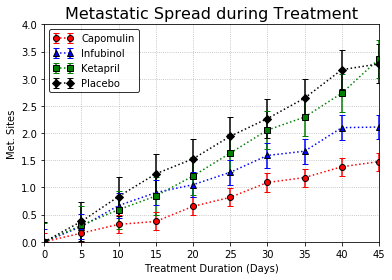

In [24]:
# Setting the lists of drugs, colors and markers respectively
drug=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
markers=["o","^","s","D"]

# Intializing the plots
fig, ax = plt.subplots()

for item in drug:
    # Setting the x_axis data,y_axis data and standard deviation for the graph
    x_data=Metastatic_Response_DF.index.values
    y_data=Metastatic_Response_DF[item]
    err=sem(Metastatic_Response_DF[item])
    
    # Finding the index for colors and markers
    index=drug.index(item)
    
    # Setting up the plot
    ax.errorbar(x_data, y_data,err,linestyle=":",color=colors[index],
                marker=markers[index],capsize=3,capthick=1,markeredgecolor='black')
    # Setting the legend
    ax.legend(loc="upper left", fancybox=True,numpoints=2,edgecolor="black")

# Setting the grid     
plt.grid(linestyle='dotted')
# Setting the x_axis and y_axis limits
ax.set_xlim(0,45)
ax.set_ylim(0,4)
# Setting the title,x_axis and y_axis labels
ax.set_title("Metastatic Spread during Treatment", fontsize=16)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")

# Display the graph
plt.show()

Survival Rates

In [26]:
# Creating a pivot table for Survival Rates
Survival_Rates=pd.pivot_table(Clinical_Combined_data, values="Tumor Volume (mm3)",
                              columns=["Drug"],index=["Timepoint"],aggfunc='count')

Survival_Rates

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [27]:
# Droping the not needed drugs from the already existing pivot table
Survival_Rates_DF=Survival_Rates.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)

Survival_Rates_DF

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


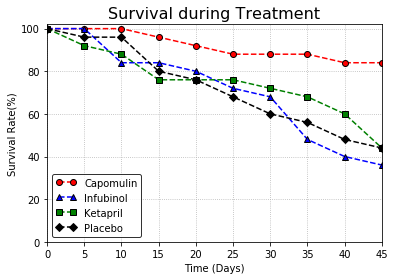

In [28]:
# Setting the lists of drugs, colors and markers respectively
drug=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
markers=["o","^","s","D"]

# Intializing the plots
fig, ax = plt.subplots()

for item in drug:
    # Setting the x_axis data and y_axis data for the graph
    x_data=Survival_Rates_DF.index.values
    y_data=(Survival_Rates_DF[item]*100)/ Survival_Rates_DF[item][0]
    
    # Finding the index for colors and markers
    index=drug.index(item)
    
    # Setting up the plot
    ax.plot(x_data,y_data,linestyle="--",color=colors[index],marker=markers[index],label=item,markeredgecolor='black')
    # Setting the legend
    ax.legend(loc="lower left", fancybox=True,numpoints=2,edgecolor="black")
    
# Setting the grid
ax.grid(linestyle='dotted')
# Setting the x_axis and y_axis limits
ax.set_xlim(0,45)
ax.set_ylim(0,102)
# Setting the title,x_axis and y_axis labels
ax.set_title("Survival during Treatment", fontsize=16)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate(%)")

# Display the graph
plt.show()

Summary Bar Graph

In [30]:
# Summary of the analysis based on % Tumor Change over 45 days
Summary=round(((Clinical_TumorResponse_DF.iloc[9,:]-Clinical_TumorResponse_DF.iloc[0,:])*100/Clinical_TumorResponse_DF.iloc[0,:]),0).to_frame()
# Renaming the column
Summary=Summary.rename(columns={0:"% Tumor Change"})

Summary

,% Tumor Change
Drug,
Capomulin,-19.0
Infubinol,46.0
Ketapril,57.0
Placebo,51.0


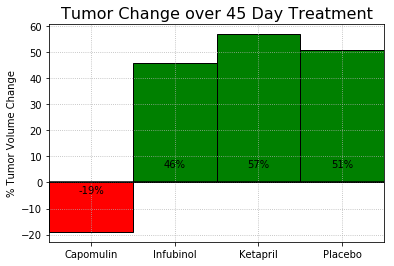

In [31]:
# Setting the x_axis and y-axis value
x_axis=Summary.index.values
y_axis=Summary["% Tumor Change"]

# If value is positive then put True in the Summary else place False, for changing the color based on the value
Summary["Positive"]=Summary["% Tumor Change"]>0

# Intializing the plots
fig,ax=plt.subplots()
#Setting the plot and assigning the color based on the Positive or not value
bars=ax.bar(x_axis,y_axis,align="edge",width=1,linewidth=1,
            edgecolor=Summary.Positive.map({True: 'black', False: 'black'}),
            color=Summary.Positive.map({True: 'green', False: 'red'}))

# Setting the ticks for the bar graph
tick_locations = [value+0.5 for value in range(len(x_axis))]
ax.set_xticks(tick_locations)

# Setting the text label in the bar graph
# Assign the height based on the positive calue
height = Summary.Positive.map({True: 5, False: -5})
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., height[bars.index(bar)],
            str(int(Summary["% Tumor Change"][bars.index(bar)]))+"%",
                ha='center', va='bottom')


# Setting the x_axis limits
ax.set_xlim(0, len(x_axis))
# Setting a horizontal line at y=0
plt.hlines(0,0,len(x_axis))
# Setting the title of the graph
ax.set_title("Tumor Change over 45 Day Treatment", fontsize=16)
# Setting the y_axis label
ax.set_ylabel("% Tumor Volume Change")

# Setting the grid line
plt.grid(linestyle='dotted')

# Display the graph
plt.show()